In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv('players_22.csv')

C:\Users\igorc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [36]:
features = ['overall', 'potential', 'value_eur', 'wage_eur', 'age']

In [37]:
players = players.dropna(subset=features)

In [38]:
data = players[features].copy()

In [40]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30


<AxesSubplot:>

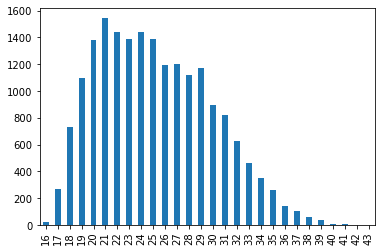

In [7]:
data['age'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

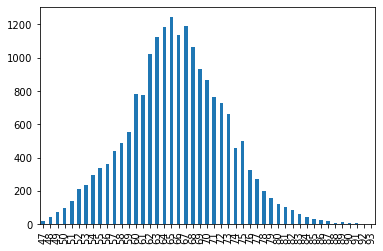

In [8]:
data['overall'].value_counts().sort_index().plot.bar()

Scale our data

In [9]:
data = (data - data.min()) / (data.max() - data.min())*9 + 1

In [10]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


Initialize random centroids

In [12]:
def random_centroid(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [13]:
centroids = random_centroid(data, 5)

In [14]:
centroids

,0,1,2,3,4
overall,4.717391,6.086957,4.717391,2.565217,7.456522
potential,5.304348,4.130435,5.500000,6.282609,4.913043
value_eur,1.006542,1.008397,1.019300,1.788279,1.064534
wage_eur,1.038627,1.759657,1.167382,1.218884,1.010300
age,2.333333,2.000000,5.333333,5.000000,6.333333


In [15]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [16]:
labels = get_labels(data, centroids)

In [17]:
labels.value_counts()

0    9150
2    8364
4    1520
3     105
1      26
dtype: int64

In [18]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [20]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
    plt.show()

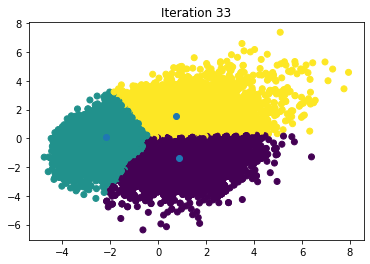

In [21]:
max_iteration = 100
k = 3

centroids = random_centroid(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [23]:
players[labels==2][['short_name']+features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
13245,D. Scarlett,63,86,1500000.0,3000.0,17
13256,L. Bate,63,83,1300000.0,5000.0,18
13351,Llabrés,63,81,1200000.0,3000.0,19
14144,H. Mejbri,62,84,1300000.0,6000.0,18


In [24]:
players_label_2 = players[labels==2][['short_name']+features]

In [25]:
players_label_2[players_label_2['age'] <= 18].head(10)

,short_name,overall,potential,value_eur,wage_eur,age
387,Pedri,81,91,54000000.0,51000.0,18
661,J. Bellingham,79,89,37000000.0,21000.0,18
859,E. Camavinga,78,89,29500000.0,44000.0,18
862,F. Wirtz,78,89,29500000.0,18000.0,18
1122,G. Reyna,77,87,22000000.0,18000.0,18
1450,A. Hložek,76,87,16000000.0,500.0,18
1459,Ansu Fati,76,90,17500000.0,44000.0,18
1962,J. Musiala,75,88,13000000.0,19000.0,18
2415,A. Aouchiche,74,82,9000000.0,9000.0,18
3040,H. Elliott,73,87,7000000.0,29000.0,18


In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

C:\Users\igorc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [28]:
centroids = kmeans.cluster_centers_

In [22]:
centroids

,0,1,2
overall,4.784633,3.206838,5.806043
potential,4.506962,4.928473,6.497993
value_eur,1.044980,1.026614,1.285501
wage_eur,1.118904,1.028505,1.420001
age,5.472247,2.518708,3.596161


In [29]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,6.222884,4.806570,3.592889
potential,6.624644,4.509576,5.200257
value_eur,1.412807,1.040288,1.035506
wage_eur,1.654305,1.113954,1.039629
age,4.125875,5.609502,2.710733


In [34]:
players[labels==2][['short_name']+features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
13245,D. Scarlett,63,86,1500000.0,3000.0,17
13256,L. Bate,63,83,1300000.0,5000.0,18
13351,Llabrés,63,81,1200000.0,3000.0,19
14144,H. Mejbri,62,84,1300000.0,6000.0,18
